# Python and Friends

This is a very quick run-through of some python syntax

In [37]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

##The Python Language

Lets talk about using Python as a calculator...

In [38]:
1+2

3

Notice integer division and floating-point error below!

In [39]:
1/2,1.0/2.0,3*3.2

(0, 0.5, 9.600000000000001)

Here is how we can print things. Something on the last line by itself is returned as the output value.

In [40]:
print 1+3.0,"\n",5/3.0
5/3

4.0 
1.66666666667


1

We can obtain the type of a variable, and use boolean comparisons tontest these types.

In [41]:
a=5.0/6.0
print(a)
print type(a)

0.833333333333
<type 'float'>


In [42]:
import types
type(a)==types.FloatType

True

In [43]:
type(a)==types.IntType

False

## Python and Iteration (and files)

In working with python I always remember: a python is a duck.

What I mean is, python has a certain way of doing things. For example lets call one of these ways listiness. Listiness works on lists, dictionaries, files, and a general notion of something called an iterator.

But first, lets introduce the notion of a comprehension. Its a way of constructing a list

In [44]:
alist=[1,2,3,4,5]
asquaredlist=[i*i for i in alist]
asquaredlist

[1, 4, 9, 16, 25]

Python has some nifty functions like `enumerate` and `zip`. The former gives a list of tuples with each tuple of the form `(index, value)`, while the latter takes elements from each list and outs them together into a tuple, thus creating a list of tuples. The first is a duck, but the second isnt.

In [45]:
enumerate(asquaredlist),zip(alist, asquaredlist)

(<enumerate at 0x10762c1e0>, [(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)])

Someone realized that design flaw and created izip.

In [46]:
from itertools import izip
izip(alist, asquaredlist)

In [47]:
print enumerate(asquaredlist)

In [48]:
[k for k in enumerate(asquaredlist)]

[(0, 1), (1, 4), (2, 9), (3, 16), (4, 25)]

Open files behave like lists too! Here we get each line in the file and find its length, using the comprehension syntax to put these lengths into a big list.

In [49]:
linelengths=[len(line) for line in open("hamlet.txt")]#poor code as we dont close the file
print linelengths

IOError: [Errno 2] No such file or directory: 'hamlet.txt'

In [50]:
sum(linelengths), np.mean(linelengths), np.median(linelengths), np.std(linelengths)

NameError: name 'linelengths' is not defined

But perhaps we want to access Hamlet word by word and not line by line

In [51]:
hamletfile=open("hamlet.txt")
hamlettext=hamletfile.read()
hamletfile.close()
hamlettokens=hamlettext.split()#split with no arguments splits on whitespace
len(hamlettokens)

IOError: [Errno 2] No such file or directory: 'hamlet.txt'

One can use the `with` syntax which cretaes a context. The file closing is then done automatically for us.

In [52]:
with open("hamlet.txt") as hamletfile:
    hamlettext=hamletfile.read()
    hamlettokens=hamlettext.split()
    print len(hamlettokens)

IOError: [Errno 2] No such file or directory: 'hamlet.txt'

There are roughly 32,000 words in Hamlet.

###The indexing of lists

In [53]:
print hamlettext[:1000]#first 1000 characters from Hamlet.

NameError: name 'hamlettext' is not defined

In [54]:
print hamlettext[-1000:]#and last 1000 characters from Hamlet.

NameError: name 'hamlettext' is not defined

Lets split the word tokens. The first one below reads, give me the second, third, and fourth words (remember that python is 0 indexed). Try and figure what the others mean.

In [55]:
print hamlettokens[1:4], hamlettokens[:4], hamlettokens[0], hamlettokens[-1]

NameError: name 'hamlettokens' is not defined

In [56]:
hamlettokens[1:8:2]#get every 2nd world between the 2nd and the 9th: ie 2nd, 4th, 6th, and 8th

NameError: name 'hamlettokens' is not defined

range and xrange get the list of integers upto N. But xrange behaves like an iterator. The reason for this is that there is no point generaing all os a million integers. We can just add 1 to the previous one and save memory. So we trade off storage for computation.

In [57]:
mylist=[]
for i in xrange(10):
    mylist.append(i)
mylist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Dictionaries

These are the bread and butter. You will use them a lot. They even duck like lists. But be careful how.

In [58]:
adict={'one':1, 'two': 2, 'three': 3}
print [i for i in adict], [(k,v) for k,v in adict.items()], adict.values()

['three', 'two', 'one'] [('three', 3), ('two', 2), ('one', 1)] [3, 2, 1]


The keys do not have to be strings. From python 2.7 you can use dictionary comprehensions as well

In [59]:
mydict ={k:v for (k,v) in zip(alist, asquaredlist)}
mydict

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25}

You can construct then nicely using the function `dict`.

In [60]:
dict(a=1, b=2)

{'a': 1, 'b': 2}

###and conversion to json

In [61]:
import json

In [62]:
s=json.dumps(mydict)
print s

{"1": 1, "2": 4, "3": 9, "4": 16, "5": 25}


In [63]:
json.loads(s)

{u'1': 1, u'2': 4, u'3': 9, u'4': 16, u'5': 25}

## Strings

Basically they behave like immutable lists

In [64]:
lastword=hamlettokens[-1]
print(lastword)

NameError: name 'hamlettokens' is not defined

In [65]:
lastword[-2]="k"#cant change a part of a string

NameError: name 'lastword' is not defined

In [66]:
lastword[-2]

NameError: name 'lastword' is not defined

In [67]:
You can join a list with a separator to make a string.

SyntaxError: invalid syntax (<ipython-input-67-17485d833e46>, line 1)

In [68]:
wierdstring=",".join(hamlettokens)
wierdstring[:1000]

NameError: name 'hamlettokens' is not defined

## Functions

Functions are even more the bread and butter. You'll see them as methods on objects, or standing alone by themselves.

In [ ]:
def square(x):
    return(x*x)
def cube(x):
    return x*x*x
square(5),cube(5)

In [ ]:
print square, type(cube)

In Python, functions are "first-class". This is just a fancy way of saying, you can pass functions to other functions

In [69]:
def sum_of_anything(x,y,f):
    print x,y,f
    return(f(x) + f(y))
sum_of_anything(3,4,square)

NameError: name 'square' is not defined

Python functions can have positional arguments and keyword arguments. Positional arguments are stored in a tuple, and keyword arguments in a dictionary. Note the "starred" syntax

In [70]:
def f(a,b,*posargs,**dictargs):
    print "got",a,b,posargs, dictargs
    return a
print f(1,3)
print f(1,3,4,d=1,c=2)

got 1 3 () {}
1
got 1 3 (4,) {'c': 2, 'd': 1}
1


>**YOUR TURN** create a dictionary with keys the integers upto and including 10, and values the cubes of these dictionaries

In [71]:
#your code here

##Booleans and Control-flow

Lets test for belonging...

In [72]:
a=[1,2,3,4,5]
1 in a

True

In [73]:
6 in a

False

Python supports if/elif/else clauses for multi-way conditionals

In [74]:
def do_it(x):
    if x==1:
        print "One"
    elif x==2:
        print "Two"
    else:
        print x
do_it(1)

One


In [75]:
do_it(2), do_it(3)

Two
3


(None, None)

You can `break` out of a loop based on a condition. The loop below is a for loop.

In [76]:
for i in range(10):
    print i
    if (i > 5):
        break

0
1
2
3
4
5
6


While loops are also supported. `continue` continues to the next iteration of the loop skipping all the code below, while `break` breaks out of it.

In [77]:
i=0
while i < 10:
    print i
    i=i+1
    if i < 5:
        continue
    else:
        break


0
1
2
3
4


## Exceptions

This is the way to catch errors.

In [78]:
try:
    f(1)#takes atleast 2 arguments
except:
    import sys
    print sys.exc_info()

(<type 'exceptions.TypeError'>, TypeError('f() takes at least 2 arguments (1 given)',), <traceback object at 0x1076705f0>)


## All together now

Lets see what hamlet gives us. We convert all words to lower-case

In [79]:
hamletlctokens=[word.lower() for word in hamlettokens]
hamletlctokens.count("thou")

NameError: name 'hamlettokens' is not defined

We then find a unique set of words using python's `set` data structure. We count how often those words occured usinf the `count` method on lists.

In [80]:
uniquelctokens=set(hamletlctokens)

NameError: name 'hamletlctokens' is not defined

In [81]:
tokendict={}
for ut in uniquelctokens:
    tokendict[ut]=hamletlctokens.count(ut)

NameError: name 'uniquelctokens' is not defined

We find the 100 most used words...

In [82]:
L=sorted(tokendict.iteritems(), key= lambda (k,v):v, reverse=True)[:100]
L

[]

Lets get the top 20 of this and plot a bar chart!

[]


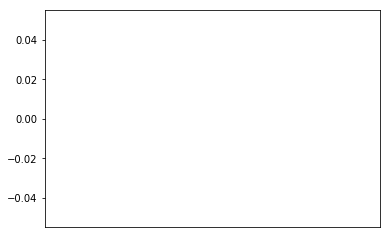

In [83]:
topfreq=L[:20]
print topfreq
pos = np.arange(len(topfreq))
plt.bar(pos, [e[1] for e in topfreq]);
plt.xticks(pos+0.4, [e[0] for e in topfreq]);